I have been reading "Naked Statistics: Stripping the Dread from the Data" by Charles Wheelan (ISBN: 978-0-393-07195-5) and wanted to try to test out the central limit theorum in python with some raw data. The chapter on regression analysis (chapter 11) posites that "we expect that more than half of our observed regression coefficients will lie within one standard error of the true population parameters." In the example below, I used the slope relationships between two variables (height and weight) in a data set that includes gender, height and weight of people to see if the theory holds when pulling subsamples from the set. If the central limit theorum holds, the relationship of subsamples of the data set should fall within a normal distribution curve of the primary data set (68% within 1 standard error, 95% within 2 standard errors). Let's check it out.

In [1]:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [2]:
dataset = pd.read_csv("weight-height.csv") #data from https://www.kaggle.com/mustafaali96/weight-height

Check that the dataset loaded and look at the results

In [3]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Let's just look at males for this analysis

In [5]:
dataset = dataset[dataset['Gender']=='Male']

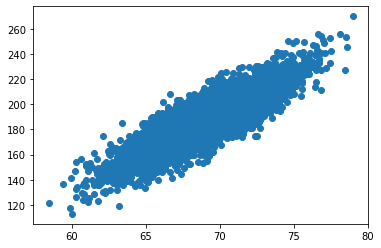

In [6]:
plt.scatter(x=dataset['Height'],y=dataset['Weight'])

In [7]:
slope, intercept, r_value, pv, stderr = stats.linregress(dataset['Height'],dataset['Weight'])

In [8]:
slope

5.961773812027692

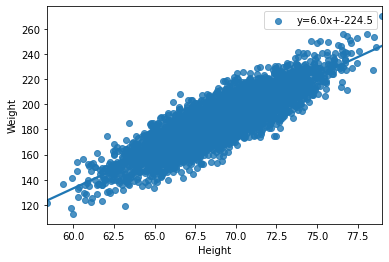

In [9]:
sns.regplot(x='Height',y='Weight', data=dataset, ci=None, label="y={0:.1f}x+{1:.1f}".format(slope,intercept)).legend(loc="best")

Looks like the regression formula for the data is y=6x-224.5! So the true association between height and weight in the complete data set is ~6 (the slope). So roughtly for every inch in height, you weigh 6 pounts more. The central limit theorum postulates that if we take random samples from this data that are large enough, then the samples' slopes should fall within the normal distribution based on the standard error values of height. Let's calculate the standard error.

In [10]:
dataset.sem(axis=0)

Height    0.040494
Weight    0.279748
dtype: float64

Standard error for height is 0.040494. Let's take 10000 samples from the broader data set and determine how many of their slopes (the relationship between height and weight) fall within 2 se values = it should be roughly 95%

In [11]:
se = 0.040494
sample_size = 10000
df_sample_slopes = pd.DataFrame()

In [12]:
slopes = []
for x in range (sample_size):
    df = dataset.sample(n=500)
    slope, intercept, r_value, pv, se = stats.linregress(df['Height'],df['Weight'])
    slopes.append(slope)
slopes = pd.DataFrame(slopes)

In [13]:
slopes

,0
0,5.788047
1,5.729554
2,5.816605
3,5.940621
4,5.896838
...,...
9995,5.852192
9996,6.090275
9997,5.899551
9998,5.765015


In [14]:
slopes[0].between(left=6 - (2*se), right=6 + (2*se)).sum()

9648

Looks like ~97% as expected (should be greater than 95%)! Let's see if roughly 68% of the values fall within 1 se

In [15]:
slopes[0].between(left=6 - (1*se), right=6 + (1*se)).sum()

7105

Looks like ~71% as expected! Very good. The theorum holds!